Image processing assignments

All the image processing assignments require to use the following dataset:

www.kaggle.com/datasets/ztaihong/weizmann-horse-database/data

The dataset contains in the horse directory 327 pictures of horses and in the mask directory where each image correspond to one image in the horse directory, and reports the corresponding manual segmentation of the horse.


Assignment 5
Perform image segmentation on all images in the dataset, using the normalized cut algorithm running on the top of superpixels rather than on raw pixels. For each image compute an accuracy metric (which one it is up to you to decide) measuring the overlap between the segments identified by NCUT and the ground truth horse semantic segmentation. Provide a table summarizing the average segmentation accuracy on all images, plus present 2 examples of images that are well-segmented (according to the above defined metric).

Hint: in Python, you have an NCut implementation in the scikit-image library; in Matlab, you can use the original NCut implementation here. Superpixels are implemented both in Matlab as well as in OpenCV. Feel free to pickup the implementation you liked most (and motivate the choice).

In [1]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt

from utils1 import *

To perform image segmentation using the normalized cut algorithm on superpixels rather than raw pixels, we first need to generate superpixels for each image. We can then apply the normalized cut algorithm to these superpixels. After segmentation, we'll compare the resulting segments with the ground truth horse semantic segmentation to compute an accuracy metric.

Here's a general outline of the steps:

Generate superpixels for each image.
Apply the normalized cut algorithm on the superpixels.
Compare the resulting segments with the ground truth horse semantic segmentation.
Compute an accuracy metric.
Summarize the average segmentation accuracy on all images.
For the accuracy metric, we can use Intersection over Union (IoU), also known as Jaccard Index. It measures the overlap between the predicted segmentation and the ground truth segmentation.


In [2]:

folder_path = '..\\datasets\\weizmann_horse_db\\horse'
images = load_images_from_folder(folder_path)

<Figure size 640x480 with 0 Axes>

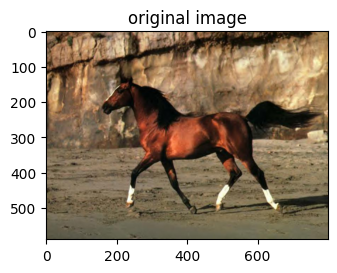

In [3]:
print_image(images[0], "original image")

# test superpixeling

<Figure size 640x480 with 0 Axes>

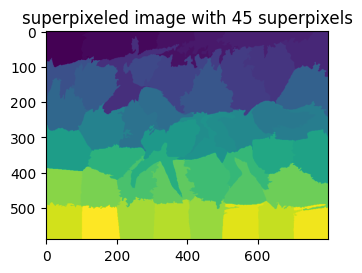

In [25]:
image = images[0]


num_superpixels = 45

# Apply SLIC algorithm to generate superpixels
segments_slic = segmentation.slic(image, n_segments=num_superpixels, compactness=30)

print_image(segments_slic, f'superpixeled image with {num_superpixels} superpixels')

Text(0.5, 1.0, 'segmented image')

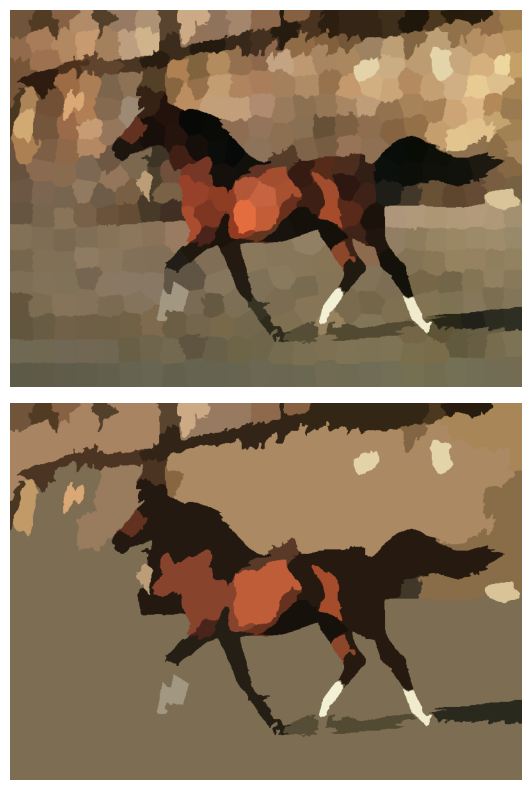

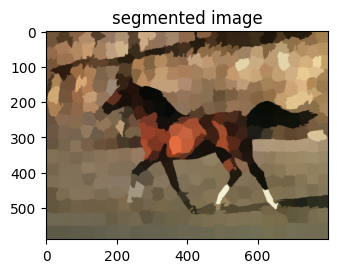

In [8]:
image = images[0]
img = image

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(out1)
plt.title('segmented image')

In [9]:
from utils1 import load_images_from_folder
folder_path = '..\\datasets\\weizmann_horse_db\\mask'
imagess = load_images_from_folder(folder_path)

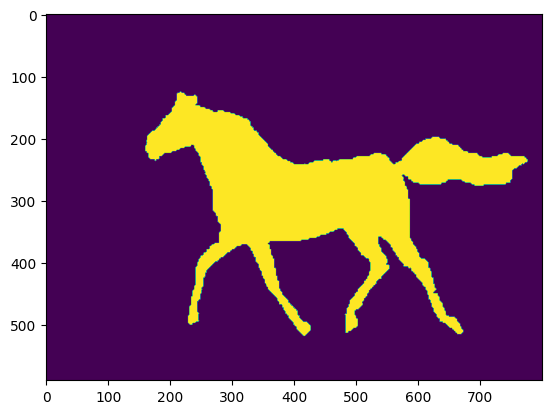

In [14]:
# check if all pixels are the same color in the mask


import numpy as np
np.unique(imagess[0])
# print the mask with 0 as black and 1 as white
plt.imshow(imagess[0])
plt.show()

